# Project 2: Data Import and cleaning

**Contents**
1. Importing libraries
2. Importing dataset
3. Data cleaning, feature engineering and data visualization
* Data cleaning
    * Handling ordinal columns
    * Impute values for LotFrontage (dealing with missing values)
    * Dropping columns with <5% unique values
    * Dropping rows where =<5% data is null

* Feature engineering
    * Transforming data
        * Creating TotalBaths column, dropping other Bath columns
        * Creating Age column
    
* Data cleaning pt 2.
    * Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice
    * Dropping outliers beyond 4std from continuous variables based on skew
    * Dummifying nominal columns
    * Dropping ID and PID column
    * Save new csv

## Data import and cleaning

### 1. Importing libraries

In [1]:
#Data processing and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew

#Modelling
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#Data splitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn import metrics

#Loading data
import os

%matplotlib inline

### 2. Importing dataset

In [2]:
# Import Ames housing data
datapath = "../data"

ames_housing_path = os.path.join(datapath,"train.csv")

ames_housing = pd.read_csv(ames_housing_path)

### 3. Data cleaning, feature engineering and data visualization

**In Order**

**Data cleaning**
* Handling ordinal columns
* Impute values for LotFrontage (dealing with missing values)
* Dropping columns with <5% unique values
* Dropping rows where =<5% data is null

**Feature engineering**
* Transforming data
    * Creating TotalBaths column, dropping other Bath columns
    * Creating Age column
    
**Data cleaning pt 2.**
* Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice
* Dropping outliers beyond 4std from continuous variables based on skew
* Dummifying nominal columns
* Dropping ID and PID column

In [3]:
#Display all columns
pd.set_option("display.max_columns", None)
#Display all rows
pd.set_option("display.max_rows", None)
#View first 5 rows 
ames_housing.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
#Delete spaces in column headers
ames_housing.columns = ames_housing.columns.str.replace(" ", "")

In [5]:
ames_housing.shape

(2051, 81)

In [6]:
#Check percentage of missing values in each column and dtype of each column
#Cross check with data description provided (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt)
percent_missing = ames_housing.isnull().sum()/ len(ames_housing) * 100
missing_value_ames = pd.DataFrame({"dtype":ames_housing.dtypes,
                                   "percent_missing": percent_missing})
print(missing_value_ames.sort_values(by = "percent_missing", ascending = False))

                 dtype  percent_missing
PoolQC          object        99.561190
MiscFeature     object        96.830814
Alley           object        93.174061
Fence           object        80.497318
FireplaceQu     object        48.756704
LotFrontage    float64        16.089712
GarageFinish    object         5.558264
GarageQual      object         5.558264
GarageYrBlt    float64         5.558264
GarageCond      object         5.558264
GarageType      object         5.509508
BsmtExposure    object         2.827889
BsmtFinType2    object         2.730375
BsmtFinType1    object         2.681619
BsmtCond        object         2.681619
BsmtQual        object         2.681619
MasVnrArea     float64         1.072647
MasVnrType      object         1.072647
BsmtHalfBath   float64         0.097513
BsmtFullBath   float64         0.097513
GarageArea     float64         0.048757
TotalBsmtSF    float64         0.048757
BsmtUnfSF      float64         0.048757
BsmtFinSF2     float64         0.048757


#### Data Cleaning
#### a) Handling ordinal columns

In [7]:
# 23 ordinal columns. Create functions to make them numeric.
# LotShape,Utilities,LandSlope,OverallQual,OverallCond,ExterQual,ExterCond,
# BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,
# KitchenQual,Functional,FireplaceQu,GarageFinish,GarageQual,GarageCond,PavedDrive,
# PoolQC,Fence

#OverallQual and OverallCond already ordered from 10-1

#Fill all null values with 0 in ordinal features
ames_housing.update(ames_housing[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2",
                                 "FireplaceQu","GarageFinish","GarageQual","GarageCond","PoolQC","Fence"]].fillna(0))

In [8]:
#Lot Shape
def lotshape_numeric(x):
    if "Reg" in x:
        return 4
    elif "IR1" in x:
        return 3
    elif "IR2" in x:
        return 2
    elif "IR3" in x:
        return 1  
    
ames_housing["LotShape"] = ames_housing.LotShape.map(lotshape_numeric)

In [9]:
#Utilities
def utilities_numeric(x):
    if "AllPub" in x:
        return 4
    elif "NoSewr" in x:
        return 3
    elif "NoSeWa" in x:
        return 2
    elif "ELO" in x:
        return 1   

ames_housing["Utilities"] = ames_housing.Utilities.map(utilities_numeric)

In [10]:
#Land Slope
def landslope_numeric(x):
    if "Gtl" in x:
        return 3
    elif "Mod" in x:
        return 2
    elif "Sev" in x:
        return 1
    
ames_housing["LandSlope"] = ames_housing.LandSlope.map(landslope_numeric)

In [11]:
#BsmtExposure
bsmtexp_numeric = {"Gd" : 4, "Av" : 3, "Mn" : 2, "No" : 1}
ames_housing = ames_housing.replace({"BsmtExposure": bsmtexp_numeric})

In [12]:
#Bsmt fin type 1 & 2
bsmtfin_numeric = {"GLQ" : 6, "ALQ" : 5, "BLQ" : 4, "Rec" : 3, "LwQ": 2, "Unf": 1}
ames_housing = ames_housing.replace({"BsmtFinType1": bsmtfin_numeric})
ames_housing = ames_housing.replace({"BsmtFinType2": bsmtfin_numeric})

In [13]:
#Electrical
def electrical_numeric(x):
    if "SBrkr" in x:
        return 5
    elif "FuseA" in x:
        return 4
    elif "FuseF" in x:
        return 3
    elif "FuseP" in x:
        return 2
    elif "Mix" in x:
        return 1
    
ames_housing["Electrical"] = ames_housing.Electrical.map(electrical_numeric)

In [14]:
#Functional
def functional_numeric(x):
    if "Typ" in x:
        return 8
    elif "Min1" in x:
        return 7
    elif "Min2" in x:
        return 6
    elif "Mod" in x:
        return 5
    elif "Maj1" in x:
        return 4
    elif "Maj2" in x:
        return 3
    elif "Sev" in x:
        return 2
    elif "Sal" in x:
        return 1
    
ames_housing["Functional"] = ames_housing.Functional.map(functional_numeric)

In [15]:
#Garagefinish
garagefin_numeric = {"Fin" : 3, "RFn": 2, "Unf": 1}
ames_housing = ames_housing.replace({"GarageFinish": garagefin_numeric})

In [16]:
#Paveddrive
def paveddrive_numeric(x):
    if "Y" in x:
        return 3
    elif "P" in x:
        return 2
    elif "N" in x:
        return 1
    
ames_housing["PavedDrive"] = ames_housing.PavedDrive.map(paveddrive_numeric)

In [17]:
#Fence
fence_numeric = {"GdPrv" : 4, "MnPrv" : 3, "GdWo": 2, "MnWw": 1}
ames_housing = ames_housing.replace({"Fence": fence_numeric})

In [18]:
#Quality and condition
qualcond_numeric = {"Ex" : 5, "Gd" : 4, "TA" : 3, "Fa": 2, "Po": 1}
ames_housing = ames_housing.replace({"ExterQual": qualcond_numeric})
ames_housing = ames_housing.replace({"ExterCond": qualcond_numeric})
ames_housing = ames_housing.replace({"BsmtQual": qualcond_numeric})
ames_housing = ames_housing.replace({"BsmtCond": qualcond_numeric})
ames_housing = ames_housing.replace({"HeatingQC": qualcond_numeric})
ames_housing = ames_housing.replace({"KitchenQual": qualcond_numeric})
ames_housing = ames_housing.replace({"FireplaceQu": qualcond_numeric})
ames_housing = ames_housing.replace({"GarageQual": qualcond_numeric})
ames_housing = ames_housing.replace({"GarageCond": qualcond_numeric})
ames_housing = ames_housing.replace({"PoolQC": qualcond_numeric})

#### b) Impute values for LotFrontage (dealing with missing values)

In [19]:
#Look at using LotArea and LotShape to predict missing LotFrontage
ames_housing[["LotFrontage","LotArea","LotShape","LotConfig"]].head()

,LotFrontage,LotArea,LotShape,LotConfig
0,NaN,13517,3,CulDSac
1,43.0,11492,3,CulDSac
2,68.0,7922,4,Inside
3,73.0,9802,4,Inside
4,82.0,14235,3,Inside


In [20]:
# Save new dataframe without any missing values
# Reference: http://localhost:8888/notebooks/Desktop/dsi25-materials/DSI-SG-25/3.08-lesson-missing-data/Lesson%203.08%20Missing%20Data.ipynb
ames_new = ames_housing.dropna()

In [21]:
# Set up model
X_columns = ames_new[["LotShape", "LotArea"]]
impute_column = ames_new["LotFrontage"]

# Instantiate
model = LinearRegression()

# Fit
model.fit(X_columns, impute_column)

LinearRegression()

In [22]:
# save indices of missing values
missing_idx = ames_housing.index[ames_housing["LotFrontage"].isnull()]

In [23]:
# Impute missing values with the prediciton from the model
ames_housing["LotFrontage_imputed"] = [ames_housing.loc[i,"LotFrontage"] if i not in missing_idx
     else model.predict(pd.DataFrame(ames_housing.loc[i,["LotShape", "LotArea"]]).T)[0]
     for i in range(ames_housing.shape[0])]

In [24]:
ames_housing[["LotFrontage","LotFrontage_imputed"]].head()

,LotFrontage,LotFrontage_imputed
0,NaN,65.040848
1,43.0,43.000000
2,68.0,68.000000
3,73.0,73.000000
4,82.0,82.000000


In [25]:
ames_housing["LotFrontage"].mean()

69.05520046484602

In [26]:
ames_housing["LotFrontage_imputed"].mean()

68.34241439968687

In [27]:
#Drop LotFrontage original column and rename imputed column
ames_housing.drop(["LotFrontage"], axis=1, inplace=True)
ames_housing.rename(columns={"LotFrontage_imputed":"LotFrontage"}, inplace=True)

#### c) Dropping columns with <5% unique values

In [28]:
#First replace all null values in "Alley", "Garage Type" and "Misc Feature" with "None"
#Reference: http://localhost:8888/notebooks/Desktop/dsi25-materials/DSI-SG-25/3_01-lab-regression-and-model-validation/solution-code/solution-code.ipynb

ames_housing.update(ames_housing[["Alley","GarageType","MiscFeature"]].fillna("None"))

In [29]:
#Reference: https://www.kaggle.com/moussasacko/basic-notebook-for-beginner
# Storing categorical and numerical variables

categorical_ames = ames_housing.select_dtypes(exclude = [np.number])
numerical_ames = ames_housing.select_dtypes(include = [np.number])

In [30]:
# Before proceeding, let's see the percentage of unique values 
# Deleting features with more than 95% of common values as these features won't be efficient to predict "SalePrice"

overfit_categorical_ames = []
for i in categorical_ames:
    counts = ames_housing[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(ames_housing) * 100 > 95:
        overfit_categorical_ames.append(i)

overfit_categorical_ames = list(overfit_categorical_ames)
ames_housing = ames_housing.drop(overfit_categorical_ames, axis=1)

In [31]:
overfit_numerical_ames = []
for i in numerical_ames:
    counts = ames_housing[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(ames_housing) * 100 > 95:
        overfit_numerical_ames.append(i)

overfit_numerical_ames = list(overfit_numerical_ames)
ames_housing = ames_housing.drop(overfit_numerical_ames, axis=1)

In [32]:
print("Categorical Features with >95% of the same value: ",overfit_categorical_ames)
print("\n")
print("Numerical Features with >95% of the same value: ",overfit_numerical_ames)

Categorical Features with >95% of the same value:  ['Street', 'Condition2', 'RoofMatl', 'Heating', 'MiscFeature']


Numerical Features with >95% of the same value:  ['Utilities', 'LandSlope', 'LowQualFinSF', 'KitchenAbvGr', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal']


In [33]:
#Check for missing values again
percent_missing = ames_housing.isnull().sum()/ len(ames_housing) * 100
missing_value_ames = pd.DataFrame({"dtype":ames_housing.dtypes,
                                   "percent_missing": percent_missing})
print(missing_value_ames.sort_values(by = "percent_missing", ascending = False))

                 dtype  percent_missing
GarageYrBlt    float64         5.558264
MasVnrArea     float64         1.072647
MasVnrType      object         1.072647
BsmtFullBath   float64         0.097513
BsmtHalfBath   float64         0.097513
GarageArea     float64         0.048757
TotalBsmtSF    float64         0.048757
BsmtUnfSF      float64         0.048757
BsmtFinSF2     float64         0.048757
BsmtFinSF1     float64         0.048757
GarageCars     float64         0.048757
Fireplaces       int64         0.000000
Functional       int64         0.000000
Id               int64         0.000000
TotRmsAbvGrd     int64         0.000000
KitchenQual      int64         0.000000
BedroomAbvGr     int64         0.000000
FullBath         int64         0.000000
GrLivArea        int64         0.000000
HalfBath         int64         0.000000
GarageType      object         0.000000
FireplaceQu      int64         0.000000
1stFlrSF         int64         0.000000
GarageFinish     int64         0.000000


#### d) Dropping rows where =<5% data is null

In [34]:
#Dropping rows where =<5% data is null
ames_housing = ames_housing.dropna(axis=0, subset=["GarageYrBlt","MasVnrArea","BsmtHalfBath","BsmtFullBath",
                                                  "BsmtUnfSF","BsmtFinSF1","GarageCars","GarageArea",
                                                  "TotalBsmtSF","BsmtFinSF2"])

In [35]:
ames_housing.shape

(1914, 68)

#### Feature Engineering
#### a) Creating TotalBaths column, dropping other Bath columns

In [36]:
# Let's look at specific relationships to sales price in numerical columns
numericals = ames_housing.select_dtypes(include = [np.number])

In [37]:
#Bath and sale price
bath_cols = [col for col in numericals.columns if "Bath" in col] + ["SalePrice"]
print(bath_cols)

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'SalePrice']


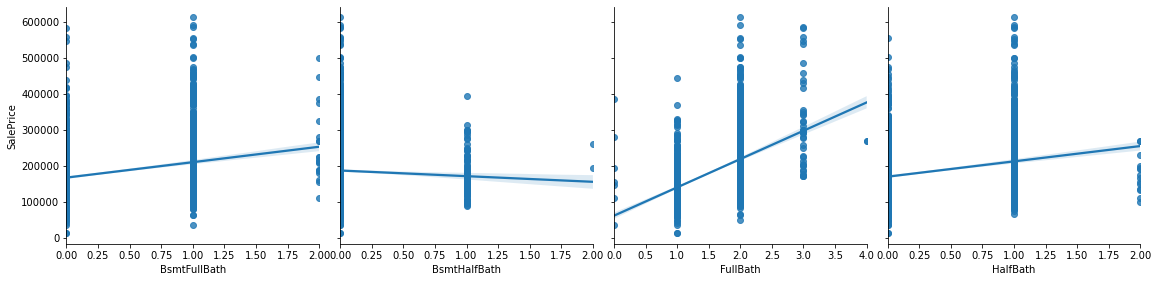

In [38]:
g = sns.PairGrid(numericals, y_vars=['SalePrice'], x_vars=['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'], height=4)
g.map(sns.regplot)

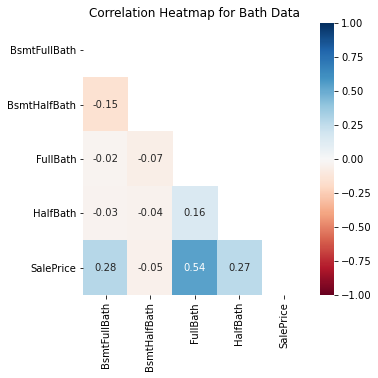

In [39]:
corr = numericals[bath_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
                                  
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(corr,annot=True,mask = mask, cmap="RdBu",fmt=".2f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Bath Data");

**Notes**

Findings - Only the no. of FullBaths seems to have a strong correlation with SalePrice.

Let's combine all the baths into a single variable TotalBaths.

In [40]:
ames_housing["TotalBaths"] = ames_housing["BsmtFullBath"] + ames_housing["BsmtHalfBath"]*0.5 + ames_housing["FullBath"] + ames_housing["HalfBath"]*0.5
ames_housing[['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath','TotalBaths']].head()

,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,TotalBaths
0,0.0,0.0,2,1,2.5
1,1.0,0.0,2,1,3.5
2,1.0,0.0,1,0,2.0
3,0.0,0.0,2,1,2.5
4,0.0,0.0,2,0,2.0


**Notes**

Let's see the correlation between the new variable and SalePrice

In [41]:
ames_housing["TotalBaths"].corr(ames_housing["SalePrice"])

0.6332534114223064

**Notes**

Findings - The correlation between the new variable and SalePrice performs better than when each variable is isolated.

Let's drop the other Bath columns.

In [42]:
#Drop other Bath columns
ames_housing.drop(columns =['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'],axis=1,inplace= True)

In [43]:
ames_housing.shape

(1914, 65)

#### b) Creating Age column

In [44]:
#Years and sale price
year_cols = [col for col in numericals.columns if "Year" in col] + [col for col in numericals.columns if "Sold" in col] + [col for col in numericals.columns if "YrBlt" in col] + ["SalePrice"]
print(year_cols)

['YearBuilt', 'YearRemod/Add', 'MoSold', 'YrSold', 'GarageYrBlt', 'SalePrice']


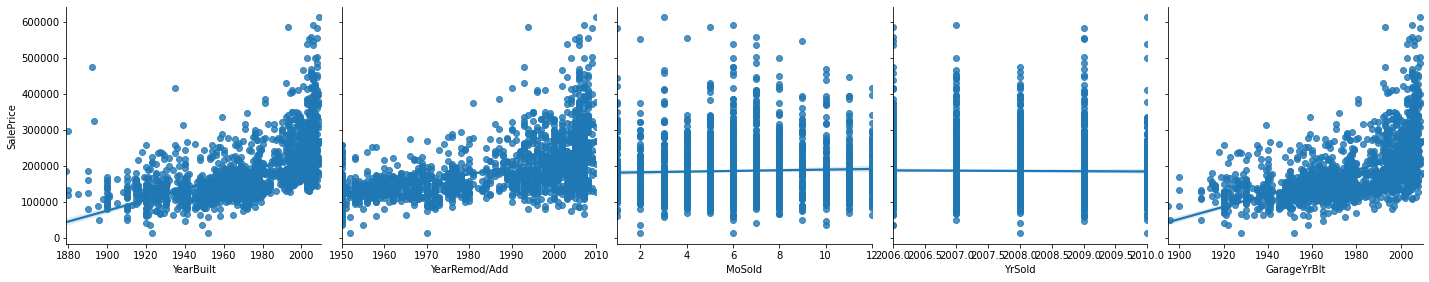

In [45]:
g = sns.PairGrid(numericals, y_vars=['SalePrice'], x_vars=['YearBuilt', 'YearRemod/Add', 'MoSold', 'YrSold', 'GarageYrBlt'], height=4)
g.map(sns.regplot)

**Notes**

Findings - the later(year) the house was built/remod in, the higher it sold for.

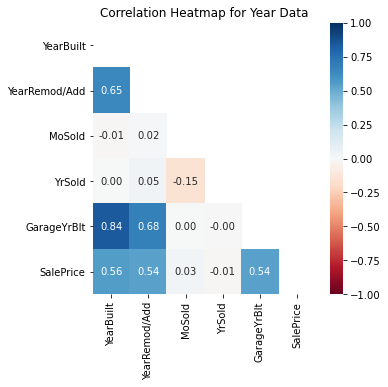

In [46]:
corr = numericals[year_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
                                  
fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(corr,annot=True,mask = mask, cmap="RdBu",fmt=".2f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Year Data");

**Notes**

Let's create an age column by subtracting the year the house was built/remodelled in from the year it was sold in.

In [47]:
ames_housing["Age"] = ames_housing["YrSold"] - ames_housing["YearRemod/Add"]

**Notes**

Let's see the correlation between the new variable and SalePrice.

In [48]:
ames_housing["Age"].corr(ames_housing["SalePrice"])

-0.5446408714864658

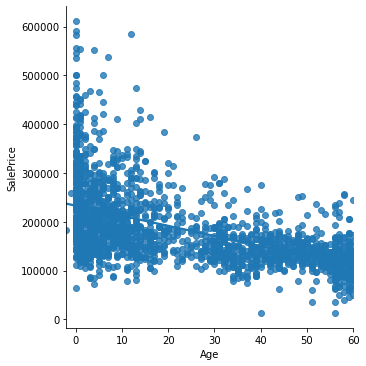

In [49]:
sns.lmplot(x = "Age", y = "SalePrice", data = ames_housing,
           ci = False);

**Notes**

Findings - The correlation is moderate but it shows that the younger the house, the higher the sale price.

Let's not drop any of the features yet as I want to see how they all perform against each other and Sale Price.

I will then remove variables for colinearity.

In [50]:
ames_housing.shape

(1914, 66)

#### Data cleaning pt 2.
#### a) Checking for intercorrelated features for numerical data and dropping columns with high colinearity with other features but low correlation to SalePrice

In [51]:
numericals_v2 = ames_housing.select_dtypes(include = [np.number])

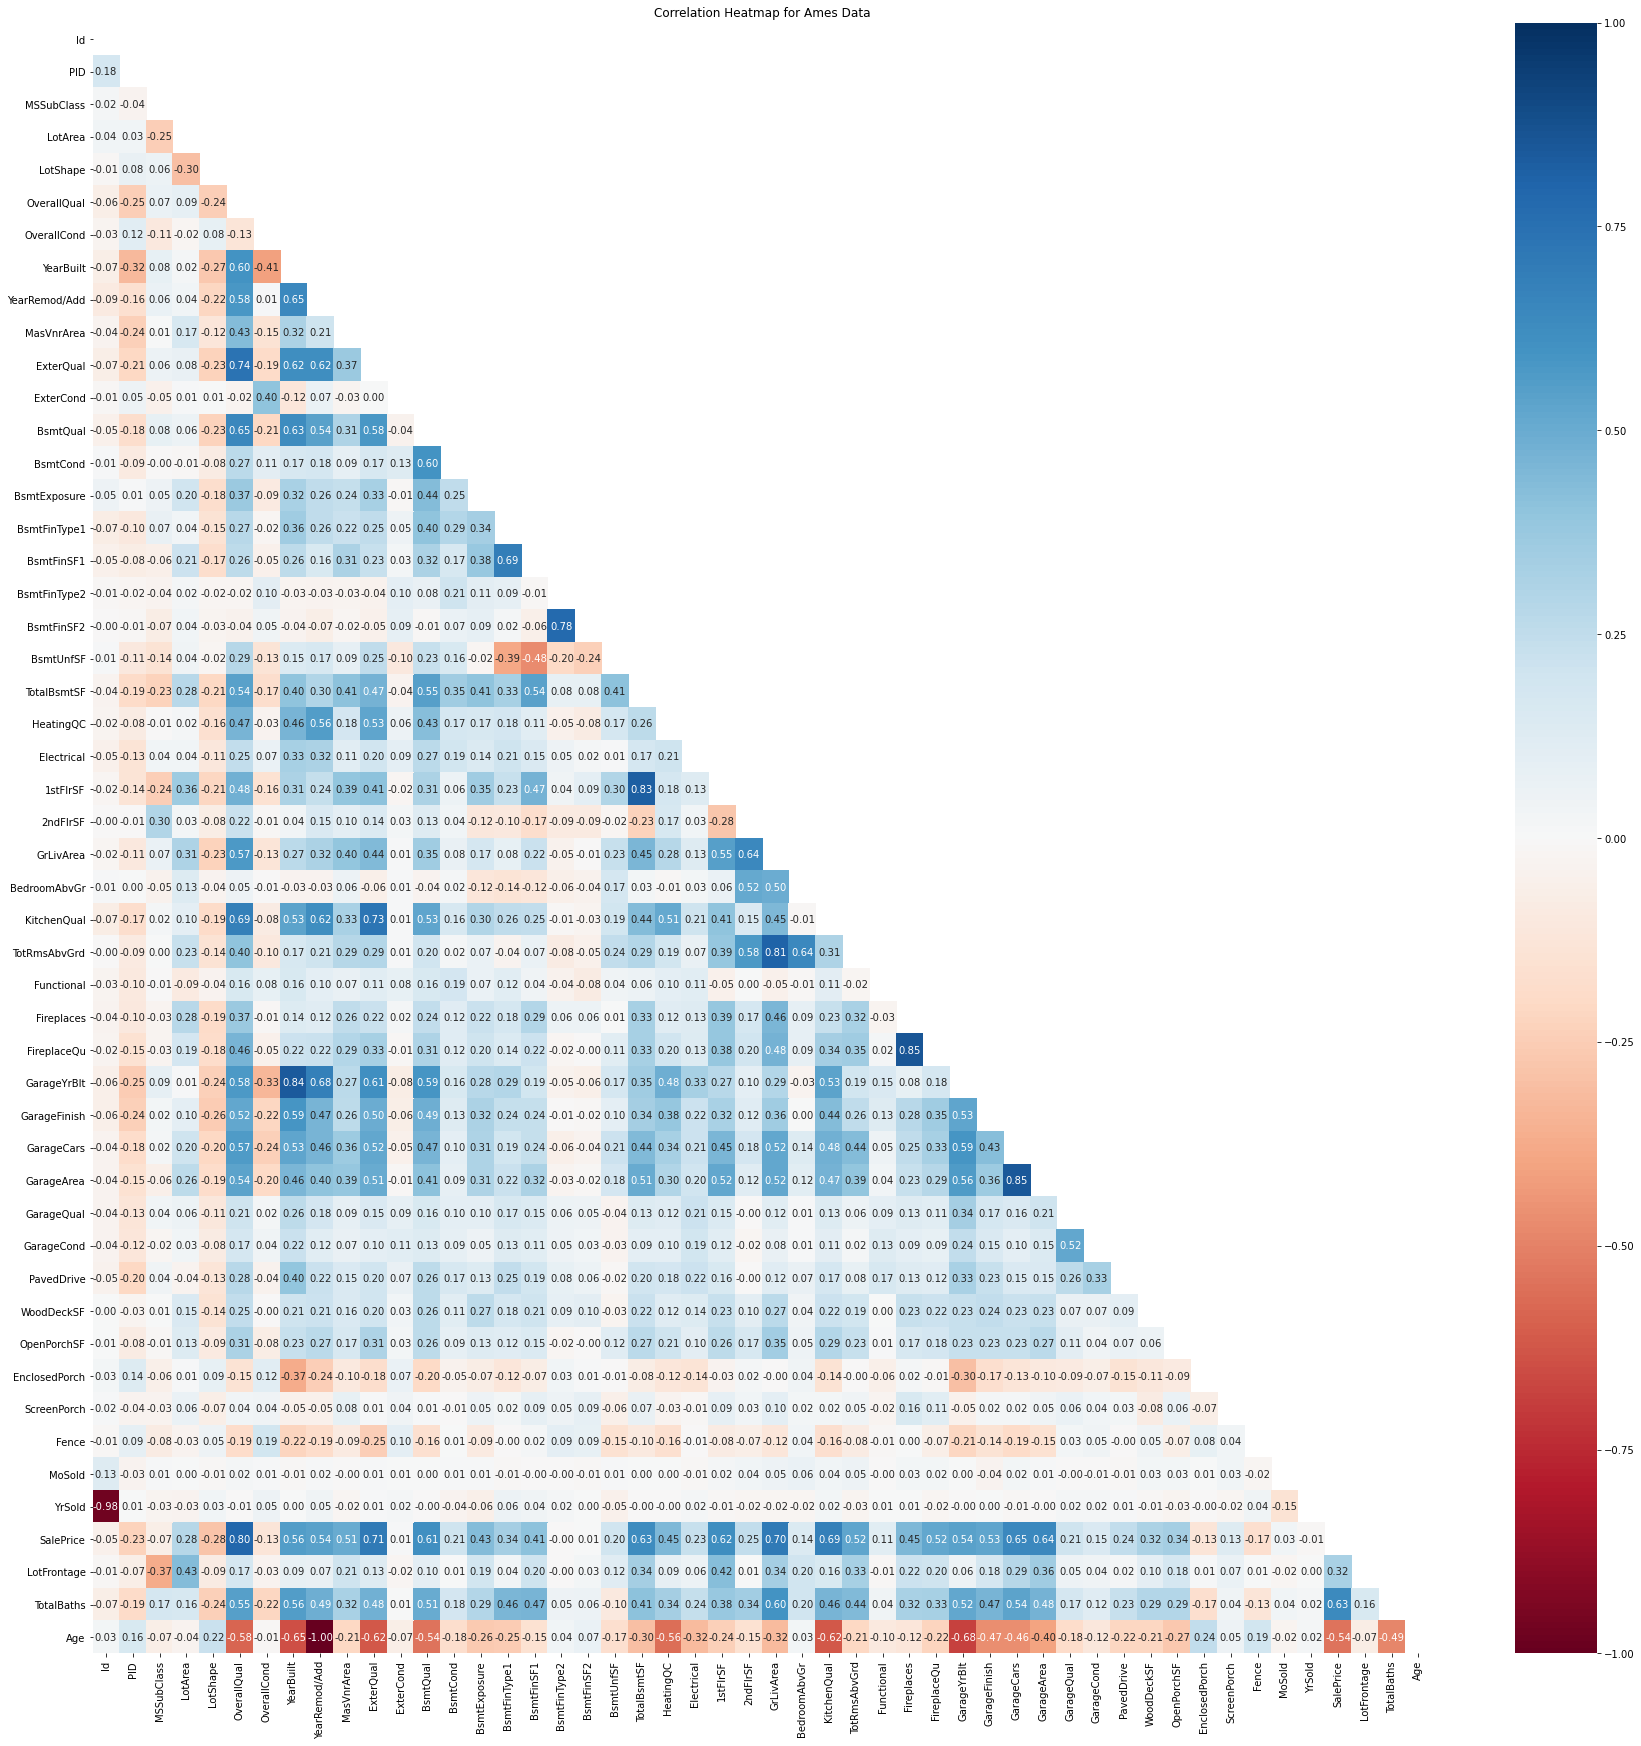

In [52]:
corr = numericals_v2.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
                                  
fig = plt.figure(figsize=(30,30))
ax = sns.heatmap(corr,annot=True,mask = mask, cmap="RdBu",fmt=".2f",
                 vmin = -1, vmax = 1,center=0)
ax.set_title("Correlation Heatmap for Ames Data");

**Notes**

The following features are highly intercorrelated (r = >0.6). 

The feature with the best correlation to Sale Price will be retained. The rest will be dropped.
_To Keep - To Drop_

OverallQual - KitchenQual,BsmtQual,ExterQual

YearBuilt - Age,GarageYrBlt,YearRemod/Add

BsmtFinSF1 - BsmtFinType1 

BsmtFinSF2 - BsmtFinType2

TotalBsmtSF - 1stFlrSF

GrLivArea - 2ndFlrSF,TotRmsAbvGrd

FireplaceQu - Fireplaces

GarageCars - GarageArea

In [53]:
ames_housing.drop(columns =["KitchenQual","BsmtQual","ExterQual",
                           "Age","GarageYrBlt","YearRemod/Add",
                           "BsmtFinType1","BsmtFinType2","1stFlrSF",
                           "2ndFlrSF","TotRmsAbvGrd","Fireplaces",
                           "GarageArea"],axis=1,inplace= True)

In [54]:
ames_housing.shape

(1914, 53)

#### b) Dropping outliers beyond 4std from continuous variables based on skew

In [55]:
#Looking at continuous variables
numerical_ames_v3 = ames_housing.select_dtypes(include = [np.number])
continuous_ames = numerical_ames_v3[["LotFrontage","LotArea","MasVnrArea","BsmtFinSF1",
                                   "BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
                                   "GrLivArea","WoodDeckSF","OpenPorchSF",
                                   "EnclosedPorch", "SalePrice"]]

In [56]:
continuous_ames.skew().sort_values(ascending = False)

LotArea          9.308964
BsmtFinSF2       4.119104
EnclosedPorch    2.992270
MasVnrArea       2.520081
OpenPorchSF      2.234967
LotFrontage      2.146514
WoodDeckSF       1.986619
BsmtFinSF1       1.610339
SalePrice        1.598148
TotalBsmtSF      1.490656
GrLivArea        1.297578
BsmtUnfSF        0.934800
dtype: float64

array([[<AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'WoodDeckSF'}>],
       [<AxesSubplot:title={'center':'OpenPorchSF'}>,
        <AxesSubplot:title={'center':'EnclosedPorch'}>,
        <AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

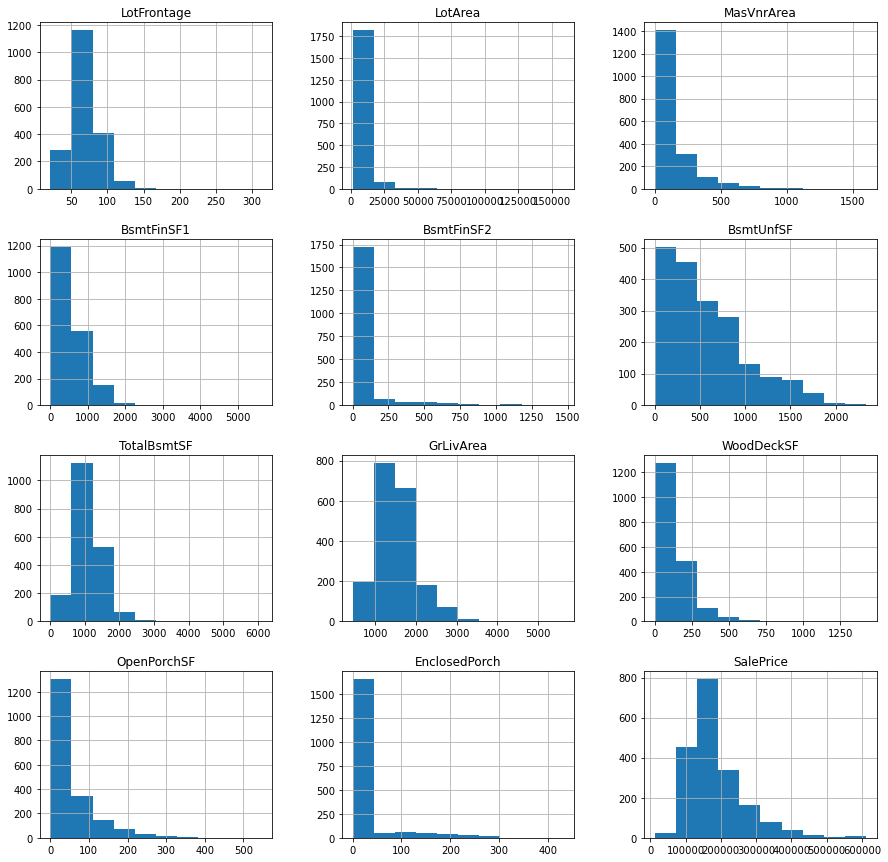

In [57]:
continuous_ames.hist(figsize=(15,15))

**Notes**

Based on skewness, remove outliers more than 4 std for features that have a skewness of >=1.

In [58]:
#"Lot Area"
print(ames_housing.LotArea[(ames_housing.LotArea > np.mean(ames_housing.LotArea) + 4*np.std(ames_housing.LotArea))].count())

#"Lot Area"
print(ames_housing.LotArea[(ames_housing.LotArea < np.mean(ames_housing.LotArea) - 4*np.std(ames_housing.LotArea))].count())

18
0


In [59]:
#"LotFrontage"
print(ames_housing.LotFrontage[(ames_housing.LotFrontage > np.mean(ames_housing.LotFrontage) + 4*np.std(ames_housing.LotFrontage))].count())

#"LotFrontage"
print(ames_housing.LotFrontage[(ames_housing.LotFrontage < np.mean(ames_housing.LotFrontage) - 4*np.std(ames_housing.LotFrontage))].count())

7
0


In [60]:
#"MasVnrArea"
print(ames_housing.MasVnrArea[(ames_housing.MasVnrArea > np.mean(ames_housing.MasVnrArea) + 4*np.std(ames_housing.MasVnrArea))].count())

#"MasVnrArea"
print(ames_housing.MasVnrArea[(ames_housing.MasVnrArea < np.mean(ames_housing.MasVnrArea) - 4*np.std(ames_housing.MasVnrArea))].count())

16
0


In [61]:
#"BsmtFinSF1"
print(ames_housing.BsmtFinSF1[(ames_housing.BsmtFinSF1 > np.mean(ames_housing.BsmtFinSF1) + 4*np.std(ames_housing.BsmtFinSF1))].count())

#"BsmtFinSF1"
print(ames_housing.BsmtFinSF1[(ames_housing.BsmtFinSF1 < np.mean(ames_housing.BsmtFinSF1) - 4*np.std(ames_housing.BsmtFinSF1))].count())

2
0


In [62]:
#"BsmtFinSF2"
print(ames_housing.BsmtFinSF2[(ames_housing.BsmtFinSF2 > np.mean(ames_housing.BsmtFinSF2) + 4*np.std(ames_housing.BsmtFinSF2))].count())

#"BsmtFinSF2"
print(ames_housing.BsmtFinSF2[(ames_housing.BsmtFinSF2 < np.mean(ames_housing.BsmtFinSF2) - 4*np.std(ames_housing.BsmtFinSF2))].count())

35
0


In [63]:
#"TotalBsmtSF"
print(ames_housing.TotalBsmtSF[(ames_housing.TotalBsmtSF > np.mean(ames_housing.TotalBsmtSF) + 4*np.std(ames_housing.TotalBsmtSF))].count())

#"TotalBsmtSF"
print(ames_housing.TotalBsmtSF[(ames_housing.TotalBsmtSF < np.mean(ames_housing.TotalBsmtSF) - 4*np.std(ames_housing.TotalBsmtSF))].count())

5
0


In [64]:
#"GrLivArea"
print(ames_housing.GrLivArea[(ames_housing.GrLivArea > np.mean(ames_housing.GrLivArea) + 4*np.std(ames_housing.GrLivArea))].count())

#"GrLivArea"
print(ames_housing.GrLivArea[(ames_housing.GrLivArea < np.mean(ames_housing.GrLivArea) - 4*np.std(ames_housing.GrLivArea))].count())

6
0


In [65]:
#"WoodDeckSF"
print(ames_housing.WoodDeckSF[(ames_housing.WoodDeckSF > np.mean(ames_housing.WoodDeckSF) + 4*np.std(ames_housing.WoodDeckSF))].count())

#"WoodDeckSF"
print(ames_housing.WoodDeckSF[(ames_housing.WoodDeckSF < np.mean(ames_housing.WoodDeckSF) - 4*np.std(ames_housing.WoodDeckSF))].count())

12
0


In [66]:
#"OpenPorchSF"
print(ames_housing.OpenPorchSF[(ames_housing.OpenPorchSF > np.mean(ames_housing.OpenPorchSF) + 4*np.std(ames_housing.OpenPorchSF))].count())

#"OpenPorchSF"
print(ames_housing.OpenPorchSF[(ames_housing.OpenPorchSF < np.mean(ames_housing.OpenPorchSF) - 4*np.std(ames_housing.OpenPorchSF))].count())

14
0


In [67]:
#"EnclosedPorch"
print(ames_housing.EnclosedPorch[(ames_housing.EnclosedPorch > np.mean(ames_housing.EnclosedPorch) + 4*np.std(ames_housing.EnclosedPorch))].count())

#"EnclosedPorch"
print(ames_housing.EnclosedPorch[(ames_housing.EnclosedPorch < np.mean(ames_housing.EnclosedPorch) - 4*np.std(ames_housing.EnclosedPorch))].count())

23
0


In [68]:
#"SalePrice"
print(ames_housing.SalePrice[(ames_housing.SalePrice > np.mean(ames_housing.SalePrice) + 4*np.std(ames_housing.SalePrice))].count())

#"SalePrice"
print(ames_housing.SalePrice[(ames_housing.SalePrice < np.mean(ames_housing.SalePrice) - 4*np.std(ames_housing.SalePrice))].count())

11
0


In [69]:
ames_housing.shape

(1914, 53)

In [70]:
#Removing the outliers
#Reference: http://localhost:8888/notebooks/Desktop/Cracking_Ames_Housing_OLS/Ames_engineering.ipynb
#"LotFrontage","LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","TotalBsmtSF",
# "GrLivArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","SalePrice"

ames_rem = ames_housing[(ames_housing.LotArea < np.mean(ames_housing.LotArea) + 4*np.std(ames_housing.LotArea))]
ames_rem = ames_rem[(ames_rem.LotFrontage < np.mean(ames_housing.LotFrontage) + 4*np.std(ames_housing.LotFrontage))]
ames_rem = ames_rem[(ames_rem.MasVnrArea < np.mean(ames_housing.MasVnrArea) + 4*np.std(ames_housing.MasVnrArea))]
ames_rem = ames_rem[(ames_rem.BsmtFinSF1 < np.mean(ames_housing.BsmtFinSF1) + 4*np.std(ames_housing.BsmtFinSF1))]

ames_rem = ames_rem[(ames_rem.BsmtFinSF2 < np.mean(ames_housing.BsmtFinSF2) + 4*np.std(ames_housing.BsmtFinSF2))]
ames_rem = ames_rem[(ames_rem.TotalBsmtSF < np.mean(ames_housing.TotalBsmtSF) + 4*np.std(ames_housing.TotalBsmtSF))]

ames_rem = ames_rem[(ames_rem.GrLivArea < np.mean(ames_housing.GrLivArea) + 4*np.std(ames_housing.GrLivArea))]
ames_rem = ames_rem[(ames_rem.WoodDeckSF < np.mean(ames_housing.WoodDeckSF) + 4*np.std(ames_housing.WoodDeckSF))]

ames_rem = ames_rem[(ames_rem.OpenPorchSF < np.mean(ames_housing.OpenPorchSF) + 4*np.std(ames_housing.OpenPorchSF))]
ames_rem = ames_rem[(ames_rem.EnclosedPorch < np.mean(ames_housing.EnclosedPorch) + 4*np.std(ames_housing.EnclosedPorch))]
ames_rem = ames_rem[(ames_rem.SalePrice < np.mean(ames_housing.SalePrice) + 4*np.std(ames_housing.SalePrice))]

In [71]:
# 124 outliers removed
ames_rem.shape

(1790, 53)

In [72]:
#check skewness
ames_rem.skew().sort_values(ascending = False)

BsmtFinSF2       3.901078
ScreenPorch      3.744397
EnclosedPorch    2.885053
MasVnrArea       1.822337
Fence            1.766204
OpenPorchSF      1.635745
ExterCond        1.556439
MSSubClass       1.337963
SalePrice        1.226396
WoodDeckSF       1.206390
BsmtExposure     1.165996
LotArea          1.034579
BsmtUnfSF        0.920955
OverallCond      0.848919
GrLivArea        0.742798
BsmtFinSF1       0.706423
TotalBaths       0.366264
GarageFinish     0.365806
LotFrontage      0.350694
GarageCars       0.329402
BedroomAbvGr     0.220850
MoSold           0.207526
TotalBsmtSF      0.198829
FireplaceQu      0.155831
YrSold           0.137899
PID              0.117284
OverallQual      0.107220
Id               0.007835
HeatingQC       -0.596745
YearBuilt       -0.632324
LotShape        -1.181282
GarageQual      -1.984873
GarageCond      -3.311657
BsmtCond        -3.609382
PavedDrive      -3.655164
Electrical      -4.352765
Functional      -5.839002
dtype: float64

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'PID'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'LotShape'}>,
        <AxesSubplot:title={'center':'OverallQual'}>],
       [<AxesSubplot:title={'center':'OverallCond'}>,
        <AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'ExterCond'}>,
        <AxesSubplot:title={'center':'BsmtCond'}>,
        <AxesSubplot:title={'center':'BsmtExposure'}>],
       [<AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>,
        <AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'HeatingQC'}>,
        <AxesSubplot:title={'center':'Electrical'}>],
       [<AxesSubplot:title={'center':'GrLivArea'}>,
        <Axe

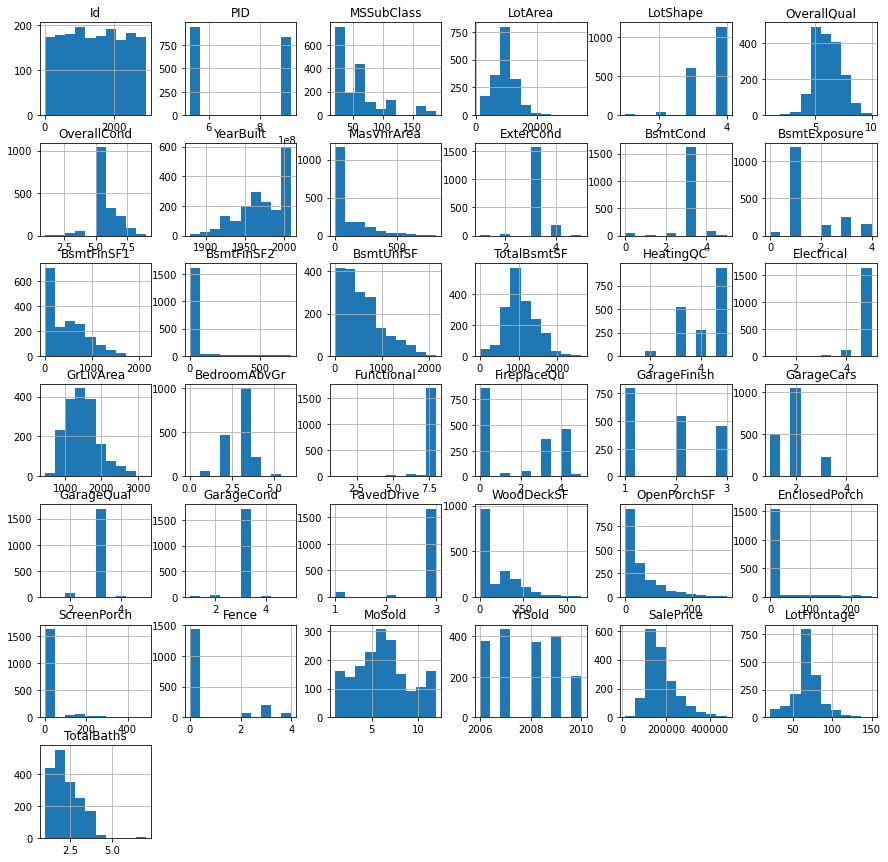

In [73]:
ames_rem.hist(figsize=(15,15))

#### c) Dummifying nominal columns

In [74]:
# MSSubClass,MSZoning, Alley,LandContour,LotConfig,Neighborhood,
# Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,
# Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,GarageType,SaleType

ames_rem = pd.get_dummies(ames_rem,
                          columns=["MSSubClass","MSZoning","Alley",
                                   "LandContour","LotConfig","Neighborhood",
                                   "Condition1","BldgType","HouseStyle",
                                   "RoofStyle","Exterior1st","Exterior2nd",
                                   "MasVnrType","Foundation","CentralAir",
                                   "GarageType","SaleType"])

In [75]:
ames_rem.shape

(1790, 183)

#### d) Dropping ID and PID column

In [76]:
ames_rem.drop(columns =["PID","Id"],axis=1, inplace = True)

In [77]:
ames_rem.shape

(1790, 181)

#### e) Save new csv

In [78]:
ames_rem.to_csv("ames_rem.csv", index = False)